# EDA Of Covid 19 India Dataset

## 1. Data
The data is taken from Kaggle. The link for it is given below: Source: https://www.kaggle.com/sudalairajkumar/covid19-in-india

In [36]:
# Step 1: Import all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as make_subplots
from datetime import datetime

In [37]:
## Let's load the data and analyze its features

covid_data = pd.read_csv('Data/covid_19_india.csv')
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [38]:
covid_data['Date'] = covid_data['Date'].astype('datetime64[ns]')
covid_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [39]:
covid_data.shape

(14510, 9)

In [40]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14510 entries, 0 to 14509
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       14510 non-null  int64         
 1   Date                      14510 non-null  datetime64[ns]
 2   Time                      14510 non-null  object        
 3   State/UnionTerritory      14510 non-null  object        
 4   ConfirmedIndianNational   14510 non-null  object        
 5   ConfirmedForeignNational  14510 non-null  object        
 6   Cured                     14510 non-null  int64         
 7   Deaths                    14510 non-null  int64         
 8   Confirmed                 14510 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1020.4+ KB


### There are tital 9 features and 14510 entries for each column. Also we can see that there are no missing values in this dataset. The dt-type for features is: numeric and object

In [41]:
# Statistical summary of data:
covid_data.describe()

,Sno,Cured,Deaths,Confirmed
count,14510.000000,1.451000e+04,14510.000000,1.451000e+04
mean,7255.500000,1.605341e+05,2550.862440,1.765499e+05
std,4188.820538,3.264755e+05,6781.796503,3.608269e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3628.250000,1.393250e+03,11.000000,2.575250e+03
50%,7255.500000,1.714550e+04,337.000000,2.251450e+04
75%,10882.750000,1.907292e+05,1954.000000,2.140565e+05
max,14510.000000,3.981658e+06,70284.000000,4.722401e+06


In [42]:
covid_data.tail(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
14500,14501,2021-05-03,8:00 AM,Puducherry,-,-,49908,833,61361
14501,14502,2021-05-03,8:00 AM,Punjab,-,-,315845,9317,385270
14502,14503,2021-05-03,8:00 AM,Rajasthan,-,-,440215,4558,633951
14503,14504,2021-05-03,8:00 AM,Sikkim,-,-,6484,149,8441
14504,14505,2021-05-03,8:00 AM,Tamil Nadu,-,-,1072322,14346,1207112
14505,14506,2021-05-03,8:00 AM,Telangana,-,-,373933,2417,456485
14506,14507,2021-05-03,8:00 AM,Tripura,-,-,33782,399,35723
14507,14508,2021-05-03,8:00 AM,Uttarakhand,-,-,135206,2802,191620
14508,14509,2021-05-03,8:00 AM,Uttar Pradesh,-,-,1004447,13162,1313361
14509,14510,2021-05-03,8:00 AM,West Bengal,-,-,733359,11539,863393


## Statewise Analysis

In [43]:
state_wise = covid_data.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths'].sum().reset_index()
state_wise['Death_percentage'] = ((state_wise['Deaths']/ state_wise['Confirmed'])*100)
state_wise.style.background_gradient(cmap='magma')


<ipython-input-43-fbc27034f826>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,State/UnionTerritory,Confirmed,Cured,Deaths,Death_percentage
0,Andaman and Nicobar Islands,1219722,1151077,15461,1.267584
1,Andhra Pradesh,216311284,204556175,1762534,0.814814
2,Arunachal Pradesh,3763142,3506512,11396,0.302832
3,Assam,53552311,50039229,243973,0.455579
4,Bihar,63867112,59714154,349326,0.546958
5,Cases being reassigned to states,345565,0,0,0.000000
6,Chandigarh,4904328,4440509,72209,1.472353
7,Chhattisgarh,66980478,59342088,773549,1.154887
8,Dadra and Nagar Haveli and Daman and Diu,936232,868603,622,0.066437
9,Daman & Diu,2,0,0,0.000000


In [44]:
# Let's visualise the top 10 state swith highest number of confirmed cases, deaths and recovery

In [45]:
px.bar(x=state_wise.nlargest(10, 'Confirmed')['State/UnionTerritory'],
      y=state_wise.nlargest(10, 'Confirmed')['Confirmed'],
      color_discrete_sequence= px.colors.diverging.Picnic,
      title='Top 10 state swith highest number of confirmed cases',
      labels={'State/Union Territory': 'State/UnionTerritory', 
              'Frequency': 'No. Of cases'})

In [46]:
# Top 10 states with highest number of recovered people
px.bar(x=state_wise.nlargest(10, 'Cured')['State/UnionTerritory'],
      y= state_wise.nlargest(10, 'Cured')['Cured'],
       color_discrete_sequence = px.colors.sequential.Sunset,
      title = 'Top 10 states with highest number of cured patients')

In [47]:
# Top 10 states with highest no of deaths
px.bar(x=state_wise.nlargest(10, 'Deaths')['State/UnionTerritory'],
      y=state_wise.nlargest(10, 'Deaths')['Deaths'],
      color_discrete_sequence = px.colors.diverging.curl,
      title="Top 10 states with highest number of deaths")


In [48]:
covid_data.head(15)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


## Monthwise Analysis of covid cases

In [49]:
# Let's analyse the monthly cases
month_wise = covid_data.groupby(pd.Grouper(key='Date', freq='M')).sum()

month_wise = month_wise.drop(['Sno'], axis = 1)
month_wise['Date'] = month_wise.index

first_column = month_wise.pop('Date')
month_wise.insert(0, 'Date', first_column)

index = [x for x in range(len(month_wise))]
month_wise['index'] = index
month_wise = month_wise.set_index('index')

second_column = month_wise.pop('Confirmed')
month_wise.insert(1, 'Confirmed', second_column)
month_wise['Death_percentage'] = ((month_wise['Deaths']/month_wise['Confirmed'])*100)

month_wise.style.background_gradient('twilight_shifted')

,Date,Confirmed,Cured,Deaths,Death_percentage
index,,,,,
0,2020-01-31 00:00:00,2,0,0,0.000000
1,2020-02-29 00:00:00,86,0,0,0.000000
2,2020-03-31 00:00:00,9687,808,202,2.085269
3,2020-04-30 00:00:00,422442,75443,13270,3.141260
4,2020-05-31 00:00:00,2938234,1133341,89834,3.057415
5,2020-06-30 00:00:00,10558374,5668946,319690,3.027834
6,2020-07-31 00:00:00,31726501,19980130,793511,2.501098
7,2020-08-31 00:00:00,80749620,58580895,1553468,1.923808
8,2020-09-30 00:00:00,149113758,118592934,2443374,1.638597


In [50]:
# Visualisation monthwise
fig = px.bar(month_wise, x='Date', y ='Confirmed',
            hover_data=['Cured', 'Deaths'], color='Date',
            labels={'Date':'Date(monthwise)'},
            title="Monthwise Increase in Confirmed cases")

fig.show();

In [51]:
# Highest no. of cured cases
fig = px.bar(month_wise, x='Date', y='Cured',
            hover_data=['Confirmed','Deaths'], color='Date',
            labels='Date(monthwise)',
            title='Monthwise increase in Cured Cases')

fig.show()

In [52]:
# Monthwise Deaths analysis
fig = px.bar(month_wise, x='Date', y='Deaths',
            hover_data=['Confirmed', 'Cured'],
             color='Date',
            labels='Date(monthwise)',
            title='Monthwise increase in Deaths')

fig.show();

## Analysis: 
As from the graphs we can see that ther's was an upward trend in the no. of cases and mortality rate. But more and more people are gettin cured.
In the month of Feb'2021, we can see the decrease in the cases, but it was only once and it again continues an upward trend

In [53]:
# Deaths percentage
fig = px.bar(month_wise, x='Date', y='Death_percentage',
            hover_data=['Confirmed', 'Deaths'],
            color='Date',
            labels='Date(monthwise)',
            title='states with highest number of death rate')

fig.show();

## EDA of Statewise Testing Details dataset

In [54]:
covid_testing = pd.read_csv('Data/StatewiseTestingDetails.csv')
covid_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [55]:
covid_testing.shape

(12849, 5)

In [56]:
covid_testing['Date'] = covid_testing['Date'].astype('datetime64[ns]')
covid_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [57]:
covid_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12849 entries, 0 to 12848
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          12849 non-null  datetime64[ns]
 1   State         12849 non-null  object        
 2   TotalSamples  12849 non-null  float64       
 3   Negative      5938 non-null   object        
 4   Positive      5395 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 502.0+ KB


In [58]:
covid_testing.describe()

,TotalSamples,Positive
count,1.284900e+04,5.395000e+03
mean,3.533036e+06,5.185209e+04
std,5.726012e+06,1.649730e+05
min,5.800000e+01,0.000000e+00
25%,1.069510e+05,4.750000e+02
50%,5.779410e+05,4.072000e+03
75%,5.097274e+06,3.262600e+04
max,4.136205e+07,1.638961e+06


In [59]:
covid_testing['Negative'] = covid_testing['TotalSamples'] - covid_testing['Positive']
covid_testing.head(20)

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0
5,2020-05-19,Andaman and Nicobar Islands,6965.0,6932.0,33.0
6,2020-05-20,Andaman and Nicobar Islands,7082.0,7049.0,33.0
7,2020-05-21,Andaman and Nicobar Islands,7167.0,7134.0,33.0
8,2020-05-22,Andaman and Nicobar Islands,7263.0,7230.0,33.0
9,2020-05-23,Andaman and Nicobar Islands,7327.0,7294.0,33.0


In [60]:
covid_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12849 entries, 0 to 12848
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          12849 non-null  datetime64[ns]
 1   State         12849 non-null  object        
 2   TotalSamples  12849 non-null  float64       
 3   Negative      5395 non-null   float64       
 4   Positive      5395 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 502.0+ KB


In [61]:
# Check null values

In [62]:
covid_testing.isna().sum()

Date               0
State              0
TotalSamples       0
Negative        7454
Positive        7454
dtype: int64

In [63]:
covid_testing.dtypes

Date            datetime64[ns]
State                   object
TotalSamples           float64
Negative               float64
Positive               float64
dtype: object

In [67]:
# Drop null values
covid_testing = covid_testing.dropna()

In [68]:
covid_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1391.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,2652.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,2815.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,3721.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,6644.0,33.0


In [69]:
covid_testing.shape


(5395, 5)

## Statewise Analysis

In [70]:
covid_testing_state = covid_testing.groupby('State')['TotalSamples', 'Negative', 'Positive'].max().reset_index()
covid_testing_state['Positive_percentage'] = ((covid_testing_state['Positive']/covid_testing_state['TotalSamples'])*100)
covid_testing_state.style.background_gradient(cmap='PuBu')

<ipython-input-70-290fa2cf2777>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,State,TotalSamples,Negative,Positive,Positive_percentage
0,Andaman and Nicobar Islands,370896.000000,364947.000000,5949.000000,1.603954
1,Andhra Pradesh,2534304.000000,2298779.000000,235525.000000,9.293479
2,Arunachal Pradesh,122854.000000,120196.000000,2658.000000,2.163544
3,Assam,1930764.000000,1842856.000000,87908.000000,4.553016
4,Bihar,1272980.000000,1182427.000000,90553.000000,7.113466
5,Chandigarh,22198.000000,19893.000000,2305.000000,10.383818
6,Chhattisgarh,468099.000000,448640.000000,19459.000000,4.157027
7,Dadra and Nagar Haveli and Daman and Diu,72410.000000,69216.000000,3194.000000,4.410993
8,Delhi,1291411.000000,1139483.000000,151928.000000,11.764496
9,Goa,178175.000000,176827.000000,12333.000000,6.921846


In [71]:
# Top 10 states with highest no. of Totalsamples
px.bar(x=covid_testing_state.nlargest(10, 'TotalSamples')['State'],
       y=covid_testing_state.nlargest(10, 'TotalSamples')['TotalSamples'],
       labels={'y': 'TotalSamples', 'x': 'State'},
       color_discrete_sequence=px.colors.sequential.haline,
       title='Top 10 States with Highest TotalSamples')
                                                          

In [72]:
# Top 10 states with highest no. of negative cases
px.bar(x=covid_testing_state.nlargest(10, 'Negative')['State'],
      y=covid_testing_state.nlargest(10, 'Negative')['Negative'],
      labels={'y': 'Total Negative cases', 'x': 'States'},
      color_discrete_sequence=px.colors.sequential.turbid,
      title='Top 10 States with highest Negative cases')

In [73]:
# Top 10 states with highes Positive cases
px.bar(x=covid_testing_state.nlargest(10, 'Positive')['State'],
      y=covid_testing_state.nlargest(10, 'Positive')['Positive'],
      labels={'y': 'Total No. of Positive cases', 'x': 'State'},
      color_discrete_sequence=px.colors.sequential.solar)

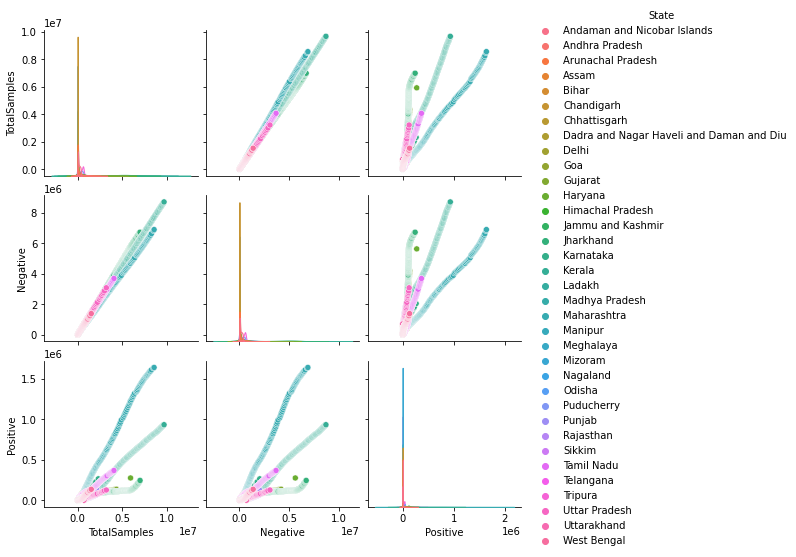

In [74]:
sns.pairplot(covid_testing, hue='State');


## EDA of Covid india Vaccine Statewise

In [75]:
covid_vaccine = pd.read_csv('Data/covid_vaccine_statewise.csv')
covid_vaccine.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,AEFI,18-30 years(Age),30-45 years(Age),45-60 years(Age),60+ years(Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280


In [76]:
covid_vaccine.shape

(3996, 18)

In [77]:
covid_vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           3996 non-null   object 
 1   State                                3996 non-null   object 
 2   Total Individuals Vaccinated         3952 non-null   float64
 3   Total Sessions Conducted             3952 non-null   float64
 4   Total Sites                          3952 non-null   float64
 5   First Dose Administered              3952 non-null   float64
 6   Second Dose Administered             3952 non-null   float64
 7   Male(Individuals Vaccinated)         3952 non-null   float64
 8   Female(Individuals Vaccinated)       3952 non-null   float64
 9   Transgender(Individuals Vaccinated)  3952 non-null   float64
 10  Total Covaxin Administered           3952 non-null   float64
 11  Total CoviShield Administered 

In [78]:
covid_vaccine.isna().sum()

Updated On                                0
State                                     0
Total Individuals Vaccinated             44
Total Sessions Conducted                 44
Total Sites                              44
First Dose Administered                  44
Second Dose Administered                 44
Male(Individuals Vaccinated)             44
Female(Individuals Vaccinated)           44
Transgender(Individuals Vaccinated)      44
Total Covaxin Administered               44
Total CoviShield Administered            44
AEFI                                   3879
18-30 years(Age)                       3922
30-45 years(Age)                       3922
45-60 years(Age)                       3922
60+ years(Age)                         3922
Total Doses Administered                  0
dtype: int64